In [ ]:
#Importing the required Libraries
import pandas as pd
import re
import nltk
from scipy.sparse import save_npz
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
# Ensure necessary NLTK resources are available
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Label Mapping: "__label__1" -> 0 (Negative), "__label__2" -> 1 (Positive)
label_mapping = {"__label__1": 0, "__label__2": 1}

# Define function to clean and tokenize text efficiently
def process_chunk(chunk):
    # Map labels
    chunk["labels"] = chunk["labels"].map(label_mapping)

    # Convert text to lowercase and remove special characters
    chunk["text"] = chunk["text"].astype(str).str.lower().apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

    # Tokenization and Stopword Removal
    stop_words = set(stopwords.words('english'))
    chunk["tokenized_text"] = chunk["text"].apply(lambda x: word_tokenize(x))
    chunk["clean_text"] = chunk["tokenized_text"].apply(lambda tokens: " ".join([word for word in tokens if word not in stop_words]))

    return chunk[["labels", "clean_text"]]

# Define Chunk Size (Adjust based on system RAM)
chunk_size = 100000  # Process 100,000 rows at a time

In [ ]:
# File paths
train_file = "/content/drive/MyDrive/Amdari Project/e commerce reviews train.csv"
test_file = "/content/drive/MyDrive/Amdari Project/e commerce reviews test.csv"

# Output files
train_output_file = "/content/train_cleaned.csv"
test_output_file = "/content/test_cleaned.csv"

In [ ]:
# Process Train Dataset in Chunks
with pd.read_csv(train_file, chunksize=chunk_size) as reader:
    for i, chunk in enumerate(reader):
        cleaned_chunk = process_chunk(chunk)
        cleaned_chunk.to_csv(train_output_file, mode="a", header=(i == 0), index=False)
        print(f"✅ Processed Train Chunk {i+1}")

# Process Test Dataset in Chunks
with pd.read_csv(test_file, chunksize=chunk_size) as reader:
    for i, chunk in enumerate(reader):
        cleaned_chunk = process_chunk(chunk)
        cleaned_chunk.to_csv(test_output_file, mode="a", header=(i == 0), index=False)
        print(f"✅ Processed Test Chunk {i+1}")

print("✅ Train and Test datasets cleaned successfully!")

✅ Processed Train Chunk 1
✅ Processed Train Chunk 2
✅ Processed Train Chunk 3
✅ Processed Train Chunk 4
✅ Processed Train Chunk 5
✅ Processed Train Chunk 6
✅ Processed Train Chunk 7
✅ Processed Train Chunk 8
✅ Processed Train Chunk 9
✅ Processed Train Chunk 10
✅ Processed Train Chunk 11
✅ Processed Train Chunk 12
✅ Processed Train Chunk 13
✅ Processed Train Chunk 14
✅ Processed Train Chunk 15
✅ Processed Train Chunk 16
✅ Processed Train Chunk 17
✅ Processed Train Chunk 18
✅ Processed Train Chunk 19
✅ Processed Train Chunk 20
✅ Processed Train Chunk 21
✅ Processed Train Chunk 22
✅ Processed Train Chunk 23
✅ Processed Train Chunk 24
✅ Processed Train Chunk 25
✅ Processed Train Chunk 26
✅ Processed Train Chunk 27
✅ Processed Train Chunk 28
✅ Processed Train Chunk 29
✅ Processed Train Chunk 30
✅ Processed Train Chunk 31
✅ Processed Train Chunk 32
✅ Processed Train Chunk 33
✅ Processed Train Chunk 34
✅ Processed Train Chunk 35
✅ Processed Train Chunk 36
✅ Processed Train Chunk 37
✅ Processe

In [ ]:
# Load cleaned datasets
train_cleaned = pd.read_csv("/content/train_cleaned.csv")
test_cleaned = pd.read_csv("/content/test_cleaned.csv")


In [ ]:
print("Train Dataset Overview:")
print(train_cleaned.head())

Train Dataset Overview:
   labels                                         clean_text
0       1  stuning even nongamer sound track beautiful pa...
1       1  best soundtrack ever anything im reading lot r...
2       1  amazing soundtrack favorite music time hands i...
3       1  excellent soundtrack truly like soundtrack enj...
4       1  remember pull jaw floor hearing youve played g...


In [ ]:
print("\nTest Dataset Overview:")
print(test_cleaned.head())


Test Dataset Overview:
   labels                                         clean_text
0       1  great cd lovely pat one great voices generatio...
1       1  one best game music soundtracks game didnt rea...
2       0  batteries died within year bought charger jul ...
3       1  works fine maha energy better check maha energ...
4       1  great nonaudiophile reviewed quite bit combo p...


In [ ]:
#class distribution
print("\nTrain Label Distribution:")
print(train_cleaned['labels'].value_counts())


Train Label Distribution:
labels
1    1800009
0    1800001
Name: count, dtype: int64


In [ ]:
print("\nTest Label Distribution:")
print(test_cleaned['labels'].value_counts())


Test Label Distribution:
labels
1    200000
0    200000
Name: count, dtype: int64


In [ ]:
# Split Train Data
train_data, val_data = train_test_split(train_cleaned, test_size=0.2, random_state=42, stratify=train_cleaned["labels"])

# Save Train and Validation Data
train_data.to_csv("/content/train_final.csv", index=False)
val_data.to_csv("/content/val_final.csv", index=False)

print("✅ Train and Validation datasets saved successfully!")

✅ Train and Validation datasets saved successfully!


In [ ]:
# Load Train and Validation Data
train_data = pd.read_csv("/content/train_final.csv")
val_data = pd.read_csv("/content/val_final.csv")
test_data = pd.read_csv("/content/test_cleaned.csv")


In [ ]:
# Ensure there are no NaN values in the text column
train_data["clean_text"] = train_data["clean_text"].fillna("")
val_data["clean_text"] = val_data["clean_text"].fillna("")
test_data["clean_text"] = test_data["clean_text"].fillna("")

In [ ]:
# Initialize Feature Extractors
vectorizer_bow = CountVectorizer()
vectorizer_tfidf = TfidfVectorizer()

In [ ]:
# Fit and Transform on Train, Transform on Validation and Test
X_train_bow = vectorizer_bow.fit_transform(train_data["clean_text"])
X_val_bow = vectorizer_bow.transform(val_data["clean_text"])
X_test_bow = vectorizer_bow.transform(test_data["clean_text"])

X_train_tfidf = vectorizer_tfidf.fit_transform(train_data["clean_text"])
X_val_tfidf = vectorizer_tfidf.transform(val_data["clean_text"])
X_test_tfidf = vectorizer_tfidf.transform(test_data["clean_text"])

print("✅ Feature extraction completed successfully!")

✅ Feature extraction completed successfully!


In [ ]:
# Save TF-IDF Matrices
save_npz("/content/X_train_tfidf.npz", X_train_tfidf)
save_npz("/content/X_val_tfidf.npz", X_val_tfidf)
save_npz("/content/X_test_tfidf.npz", X_test_tfidf)

# Save Labels
train_data[["labels"]].to_csv("/content/y_train.csv", index=False)
val_data[["labels"]].to_csv("/content/y_val.csv", index=False)
test_data[["labels"]].to_csv("/content/y_test.csv", index=False)

In [ ]:
# Required Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import load_npz

In [ ]:
# Load Features and Labels
X_train_tfidf = load_npz("X_train_tfidf.npz")
X_val_tfidf = load_npz("X_val_tfidf.npz")
X_test_tfidf = load_npz("X_test_tfidf.npz")

y_train = pd.read_csv("y_train.csv")["labels"]
y_val = pd.read_csv("y_val.csv")["labels"]
y_test = pd.read_csv("y_test.csv")["labels"]

In [ ]:
# Train Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf, y_train)
y_pred_log_reg = log_reg.predict(X_val_tfidf)
print("Logistic Regression Accuracy:", accuracy_score(y_val, y_pred_log_reg))
print(classification_report(y_val, y_pred_log_reg))

Logistic Regression Accuracy: 0.9010738859058725
              precision    recall  f1-score   support

           0       0.90      0.90      0.90    360000
           1       0.90      0.90      0.90    360002

    accuracy                           0.90    720002
   macro avg       0.90      0.90      0.90    720002
weighted avg       0.90      0.90      0.90    720002



In [ ]:
model = log_reg

# Predict on Test Data
y_pred_test = model.predict(X_test_tfidf)

# Evaluate Performce
print("Test Set Accuracy:", accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Test Set Accuracy: 0.9009575
              precision    recall  f1-score   support

           0       0.90      0.90      0.90    200000
           1       0.90      0.90      0.90    200000

    accuracy                           0.90    400000
   macro avg       0.90      0.90      0.90    400000
weighted avg       0.90      0.90      0.90    400000



In [ ]:
# Train Faster Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    n_jobs=-1,
    random_state=42
)

rf_model.fit(X_train_tfidf, y_train)
y_pred_rf = rf_model.predict(X_val_tfidf)

print("Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))
print(classification_report(y_val, y_pred_rf))

Random Forest Accuracy: 0.7827978255615957
              precision    recall  f1-score   support

           0       0.81      0.74      0.77    360000
           1       0.76      0.83      0.79    360002

    accuracy                           0.78    720002
   macro avg       0.78      0.78      0.78    720002
weighted avg       0.78      0.78      0.78    720002



In [ ]:
#Evaluating on test data
model = rf_model
y_pred_test = model.predict(X_test_tfidf)

print("Test Set Accuracy:", accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Test Set Accuracy: 0.7831925
              precision    recall  f1-score   support

           0       0.81      0.74      0.77    200000
           1       0.76      0.83      0.79    200000

    accuracy                           0.78    400000
   macro avg       0.79      0.78      0.78    400000
weighted avg       0.79      0.78      0.78    400000



In [ ]:
#trainning with xgboost Model

!pip install xgboost

In [ ]:
import xgboost as xgb
from scipy.sparse import csr_matrix

In [ ]:
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "tree_method": "hist",
    "learning_rate": 0.1,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8
}

# Convert Validation Data to DMatrix (For Efficient Evaluation)
dval = xgb.DMatrix(csr_matrix(X_val_tfidf), label=y_val)

# Set Batch Size
batch_size = 100000  # Train on 100000 rows at a time
num_boost_round = 100  # Number of boosting rounds per batch

# Initialize XGBoost Model
xgb_model = None

# Train in Batches
for i in range(0, X_train_tfidf.shape[0], batch_size):
    print(f"\n🔹 Processing Batch {i//batch_size + 1}...")

    # Select batch data
    X_batch = X_train_tfidf[i:i+batch_size]
    y_batch = y_train.iloc[i:i+batch_size]

    # Convert to DMatrix
    dtrain = xgb.DMatrix(csr_matrix(X_batch), label=y_batch)

    # Train XGBoost (Update Model on Each Batch)
    if xgb_model is None:
        xgb_model = xgb.train(params, dtrain, num_boost_round=num_boost_round)
    else:
        xgb_model = xgb.train(params, dtrain, num_boost_round=num_boost_round, xgb_model=xgb_model)


🔹 Processing Batch 1...

🔹 Processing Batch 2...

🔹 Processing Batch 3...

🔹 Processing Batch 4...

🔹 Processing Batch 5...

🔹 Processing Batch 6...

🔹 Processing Batch 7...

🔹 Processing Batch 8...

🔹 Processing Batch 9...

🔹 Processing Batch 10...

🔹 Processing Batch 11...

🔹 Processing Batch 12...

🔹 Processing Batch 13...

🔹 Processing Batch 14...

🔹 Processing Batch 15...

🔹 Processing Batch 16...

🔹 Processing Batch 17...

🔹 Processing Batch 18...

🔹 Processing Batch 19...

🔹 Processing Batch 20...

🔹 Processing Batch 21...

🔹 Processing Batch 22...

🔹 Processing Batch 23...

🔹 Processing Batch 24...

🔹 Processing Batch 25...

🔹 Processing Batch 26...

🔹 Processing Batch 27...

🔹 Processing Batch 28...

🔹 Processing Batch 29...


In [ ]:
y_pred_xgb = (xgb_model.predict(dval) > 0.5).astype(int)


print("XGBoost Validation Accuracy:", accuracy_score(y_val, y_pred_xgb))
print(classification_report(y_val, y_pred_xgb))

XGBoost Validation Accuracy: 0.8869392029466585
              precision    recall  f1-score   support

           0       0.89      0.88      0.89    360000
           1       0.88      0.89      0.89    360002

    accuracy                           0.89    720002
   macro avg       0.89      0.89      0.89    720002
weighted avg       0.89      0.89      0.89    720002



In [ ]:
#Evaluating XGBoost Model on test data

dtest = xgb.DMatrix(csr_matrix(X_test_tfidf), label=y_test)
y_pred_test_xgb = (xgb_model.predict(dtest) > 0.5).astype(int)

# Evaluate Performance
print("XGBoost Test Set Accuracy:", accuracy_score(y_test, y_pred_test_xgb))
print(classification_report(y_test, y_pred_test_xgb))

XGBoost Test Set Accuracy: 0.8866225
              precision    recall  f1-score   support

           0       0.89      0.88      0.89    200000
           1       0.88      0.89      0.89    200000

    accuracy                           0.89    400000
   macro avg       0.89      0.89      0.89    400000
weighted avg       0.89      0.89      0.89    400000



In [ ]:
#saving the models for depolyment and future use
import joblib

# Save Logistic Regression Model
joblib.dump(log_reg, "logistic_regression_model.pkl")

# Save Random Forest Model
joblib.dump(rf_model, "random_forest_model.pkl")

# Save XGBoost Model as Pickle (.pkl)
joblib.dump(xgb_model, "xgboost_model.pkl")

print("✅ All models saved successfully as `.pkl` files!")

✅ All models saved successfully as `.pkl` files!


In [ ]:
vectorizer_tfidf = TfidfVectorizer()

# Fit on training data (ensure this is the same as model training)
vectorizer_tfidf.fit(train_data["clean_text"])

# Save the vectorizer
joblib.dump(vectorizer_tfidf, "tfidf_vectorizer.pkl")

print("✅ TF-IDF Vectorizer saved successfully!")

✅ TF-IDF Vectorizer saved successfully!


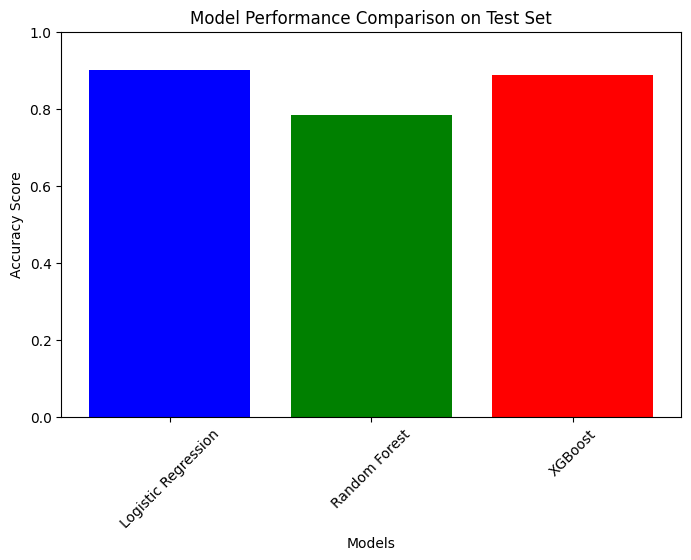

In [ ]:
#Visualizing each model performance
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ["Logistic Regression", "Random Forest", "XGBoost"]
accuracies = [
    accuracy_score(y_test, log_reg.predict(X_test_tfidf)),
    accuracy_score(y_test, rf_model.predict(X_test_tfidf)),
    accuracy_score(y_test, (xgb_model.predict(dtest) > 0.5).astype(int))  # XGBoost outputs probabilities
]

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=["blue", "green", "red"])
plt.ylim(0, 1)
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Model Performance Comparison on Test Set")
plt.xticks(rotation=45)
plt.show()

In [ ]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.0 MB/s eta 0:00:00


In [ ]:
%%writefile app.py

import os
import streamlit as st
import joblib
import pandas as pd

st.set_page_config(page_title="Sentiment Analysis", page_icon="💬", layout="wide")

# Check if required files exist before loading
if not os.path.exists("logistic_regression_model.pkl") or not os.path.exists("tfidf_vectorizer.pkl"):
    st.error("🚨 Missing model or vectorizer file! Ensure `logistic_regression_model.pkl` and `tfidf_vectorizer.pkl` exist.")
    st.stop()  # Stop execution if files are missing

@st.cache_resource
def load_model():
    return joblib.load("logistic_regression_model.pkl")

@st.cache_resource
def load_vectorizer():
    return joblib.load("tfidf_vectorizer.pkl")

# Load Model & Vectorizer
model = load_model()
vectorizer = load_vectorizer()

# Add a Beautiful Header
st.markdown(
    """
    <div style="text-align: center;">
        <h1 style="color:#FFA500;">📝 Customer Sentiment Analysis</h1>
        <h4 style="color:#666;">Analyze customer reviews with AI-powered sentiment detection.</h4>
    </div>
    """,
    unsafe_allow_html=True,
)

# Sidebar with App Information
st.sidebar.image("https://cdn-icons-png.flaticon.com/512/3771/3771518.png", width=100)
st.sidebar.title("📊 Sentiment Analysis App")
st.sidebar.markdown(
    """
    **Analyze Customer Feedback with AI**

    - 📝 Paste a customer review
    - 🚀 Click 'Analyze Sentiment'
    - 🔥 Get instant sentiment results!

    **Best for:**
    ✅ Businesses & Marketing Teams
    ✅ Customer Service Analytics
    ✅ Product & Service Reviews

    ---
    """,
    unsafe_allow_html=True,
)

# Example Reviews for Quick Testing
example_reviews = [
    "I absolutely love this product! It's amazing. 😊",
    "Terrible experience. Waste of money! 😡",
    "The service was okay, not great but not bad either.",
    "This is my favorite brand! The quality is top-notch. 💖",
    "I had a really bad experience with this company. Never again!"
]

selected_example = st.sidebar.selectbox("🔍 Try an Example Review", ["Type your own..."] + example_reviews)

# User Input Section
st.markdown("<h3 style='color:#FFA500;'>✍️ Enter a Customer Review:</h3>", unsafe_allow_html=True)
if selected_example != "Type your own...":
    user_input = st.text_area("Your Review", selected_example, height=120)
else:
    user_input = st.text_area("Your Review", "", height=120)

# Sentiment Analysis Button
if st.button("🚀 Analyze Sentiment"):
    if user_input.strip():
        # Transform input text
        input_vector = vectorizer.transform([user_input])

        # Predict sentiment
        prediction_prob = model.predict_proba(input_vector)[0]  # Get probability scores
        prediction = model.predict(input_vector)[0]
        sentiment = "😊 Positive" if prediction == 1 else "😡 Negative"
        confidence = max(prediction_prob) * 100  # Convert to percentage

        # Display Sentiment Result
        st.markdown(
            f"""
            <div style="text-align: center;">
                <h2 style="color: {'#28a745' if prediction == 1 else '#dc3545'};">
                    {sentiment}
                </h2>
                <h4>Confidence: {confidence:.2f}%</h4>
            </div>
            """,
            unsafe_allow_html=True,
        )

    else:
        st.warning("⚠️ Please enter a review before analyzing!")

# Footer
st.markdown(
    """
    <hr>
    <div style="text-align: center; font-size: 14px;">
        Built with ❤️ using Streamlit | AI-Powered Sentiment Analysis 🚀
    </div>
    """,
    unsafe_allow_html=True,
)


Writing app.py


In [ ]:
!wget -q -O - ipv4.icanhazip.com

34.86.200.86


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501



⠙⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.86.200.86:8501

⠴⠦⠧⠇⠏⠋⠙⠹your url is: https://thick-cooks-pull.loca.lt
2025-02-17 09:32:07.332 Uncaught exception GET /_stcore/stream (127.0.0.1)
HTTPServerRequest(protocol='http', host='thick-cooks-pull.loca.lt', method='GET', uri='/_stcore/stream', version='HTTP/1.1', remote_ip='127.0.0.1')
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/tornado/websocket.py", line 938, in _accept_connection
    open_result = handler.open(*handler.open_args, **handler.open_kwargs)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/streamlit/web/server/browser_websocket_handler.py", line 176, in open
    self._session_id = self._runtime.connect_session(
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.1

In [ ]:
!git config --global user.name "boiBASH"
!git config --global user.email "obashirudeen772@stu.ui.edu.ng"

In [ ]:
!curl -u "boiBASH:add token" https://api.github.com/user/repos -d '{"name":"sentiment-analysis-app"}'


{
  "id": 934110406,
  "node_id": "R_kgDON61kxg",
  "name": "sentiment-analysis-app",
  "full_name": "boiBASH/sentiment-analysis-app",
  "private": false,
  "owner": {
    "login": "boiBASH",
    "id": 67709237,
    "node_id": "MDQ6VXNlcjY3NzA5MjM3",
    "avatar_url": "https://avatars.githubusercontent.com/u/67709237?v=4",
    "gravatar_id": "",
    "url": "https://api.github.com/users/boiBASH",
    "html_url": "https://github.com/boiBASH",
    "followers_url": "https://api.github.com/users/boiBASH/followers",
    "following_url": "https://api.github.com/users/boiBASH/following{/other_user}",
    "gists_url": "https://api.github.com/users/boiBASH/gists{/gist_id}",
    "starred_url": "https://api.github.com/users/boiBASH/starred{/owner}{/repo}",
    "subscriptions_url": "https://api.github.com/users/boiBASH/subscriptions",
    "organizations_url": "https://api.github.com/users/boiBASH/orgs",
    "repos_url": "https://api.github.com/users/boiBASH/repos",
    "events_url": "https://api.gi

In [ ]:
import os

# Set your project directory (same location as your files)
project_dir = "/content"

# Move into the directory
os.chdir(project_dir)

# Initialize Git
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [ ]:
!git remote add origin https://boiBASH:add token@github.com/boiBASH/sentiment-analysis-app.git


In [ ]:
!pwd
!ls -lh

/content
total 3.4G
-rw-r--r-- 1 root root 3.5K Feb 17 09:31 app.py
drwx------ 7 root root 4.0K Feb 17 06:21 drive
-rw-r--r-- 1 root root  15M Feb 17 09:09 logistic_regression_model.pkl
-rw-r--r-- 1 root root 1.8M Feb 17 09:09 random_forest_model.pkl
drwxr-xr-x 1 root root 4.0K Feb 13 14:19 sample_data
-rw-r--r-- 1 root root 106M Feb 17 06:45 test_cleaned.csv
-rw-r--r-- 1 root root  47M Feb 17 09:12 tfidf_vectorizer.pkl
-rw-r--r-- 1 root root 948M Feb 17 06:43 train_cleaned.csv
-rw-r--r-- 1 root root 758M Feb 17 06:46 train_final.csv
-rw-r--r-- 1 root root 190M Feb 17 06:47 val_final.csv
-rw-r--r-- 1 root root 3.3M Feb 17 09:09 xgboost_model.pkl
-rw-r--r-- 1 root root 129M Feb 17 06:54 X_test_tfidf.npz
-rw-r--r-- 1 root root 950M Feb 17 06:54 X_train_tfidf.npz
-rw-r--r-- 1 root root 233M Feb 17 06:54 X_val_tfidf.npz
-rw-r--r-- 1 root root 782K Feb 17 06:55 y_test.csv
-rw-r--r-- 1 root root 5.5M Feb 17 06:55 y_train.csv
-rw-r--r-- 1 root root 1.4M Feb 17 06:55 y_val.csv


In [ ]:
%cd /content

/content


In [ ]:
!echo "drive/\n*.gform" > .gitignore

In [ ]:
!git init
!git config --global user.name "boiBASH"
!git config --global user.email "obashirudeen772@stu.ui.edu.ng"

Reinitialized existing Git repository in /content/.git/


In [ ]:
!git remote remove origin


In [ ]:
!git remote add origin https://boiBASH:add token@github.com/boiBASH/sentiment-analysis-app.git


In [ ]:
!git add app.py X_test_tfidf.npz X_train_tfidf.npz X_val_tfidf.npz logistic_regression_model.pkl random_forest_model.pkl test_cleaned.csv tfidf_vectorizer.pkl train_cleaned.csv train_final.csv val_final.csv xgboost_model.pkl y_test.csv y_train.csv y_val.csv


In [ ]:
!git commit -m "Initial commit - Sentiment Analysis Project Files"

[master (root-commit) 6968049] Initial commit - Sentiment Analysis Project Files
 15 files changed, 5120130 insertions(+)
 create mode 100644 X_test_tfidf.npz
 create mode 100644 X_train_tfidf.npz
 create mode 100644 X_val_tfidf.npz
 create mode 100644 app.py
 create mode 100644 logistic_regression_model.pkl
 create mode 100644 random_forest_model.pkl
 create mode 100644 test_cleaned.csv
 create mode 100644 tfidf_vectorizer.pkl
 create mode 100644 train_cleaned.csv
 create mode 100644 train_final.csv
 create mode 100644 val_final.csv
 create mode 100644 xgboost_model.pkl
 create mode 100644 y_test.csv
 create mode 100644 y_train.csv
 create mode 100644 y_val.csv


In [ ]:
!git lfs install

Updated git hooks.
Git LFS initialized.


In [ ]:
!git lfs track "*.pkl" "*.npz"

Tracking "*.pkl"
Tracking "*.npz"


In [ ]:
!echo "*.npz" >> .gitignore


In [ ]:
!git add .gitignore
!git add app.py logistic_regression_model.pkl random_forest_model.pkl test_cleaned.csv tfidf_vectorizer.pkl train_cleaned.csv train_final.csv val_final.csv xgboost_model.pkl y_test.csv y_train.csv y_val.csv


In [ ]:
!git commit -m "Pushed all files except .npz files"


[main 8995173] Pushed all files except .npz files
 9 files changed, 4 insertions(+)
 create mode 100644 .gitattributes
 create mode 100644 .gitignore
 rewrite X_test_tfidf.npz (99%)
 rewrite X_train_tfidf.npz (99%)
 rewrite X_val_tfidf.npz (99%)
 rewrite logistic_regression_model.pkl (99%)
 rewrite random_forest_model.pkl (99%)
 rewrite tfidf_vectorizer.pkl (99%)
 rewrite xgboost_model.pkl (99%)


In [ ]:
!git push -u origin main

Uploading LFS objects: 100% (7/7), 1.4 GB | 110 MB/s, done.
Enumerating objects: 28, done.
Counting objects: 100% (28/28), done.
Delta compression using up to 2 threads
Compressing objects: 100% (24/24), done.
error: RPC failed; HTTP 400 curl 22 The requested URL returned error: 400
send-pack: unexpected disconnect while reading sideband packet
Writing objects: 100% (28/28), 2.05 GiB | 23.41 MiB/s, done.
Total 28 (delta 2), reused 3 (delta 0), pack-reused 0
fatal: the remote end hung up unexpectedly
Everything up-to-date
